In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os

save_path = "rasters"  # Ensure this directory exists
os.makedirs(save_path, exist_ok=True)

**6 well rasters**

Saved raster plot for A1 at plots/rasters/000/A1_6_well_raster.png


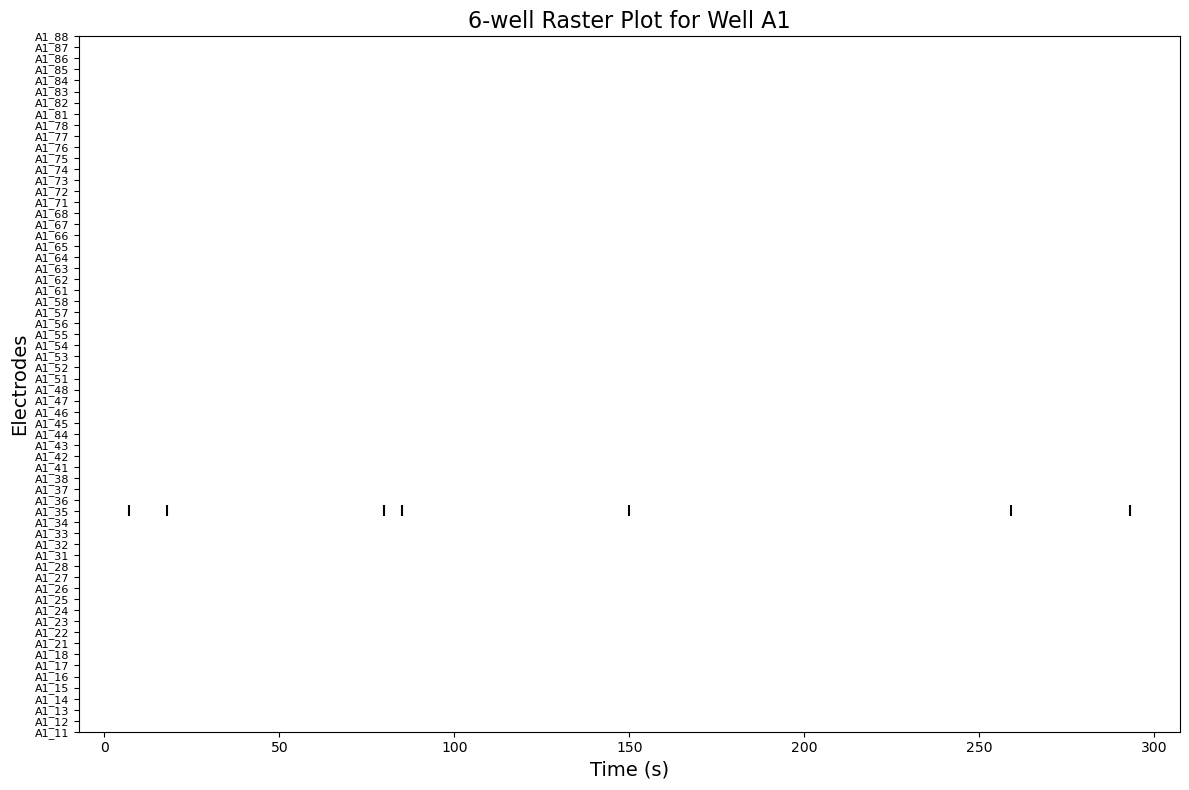

Saved raster plot for A2 at plots/rasters/000/A2_6_well_raster.png


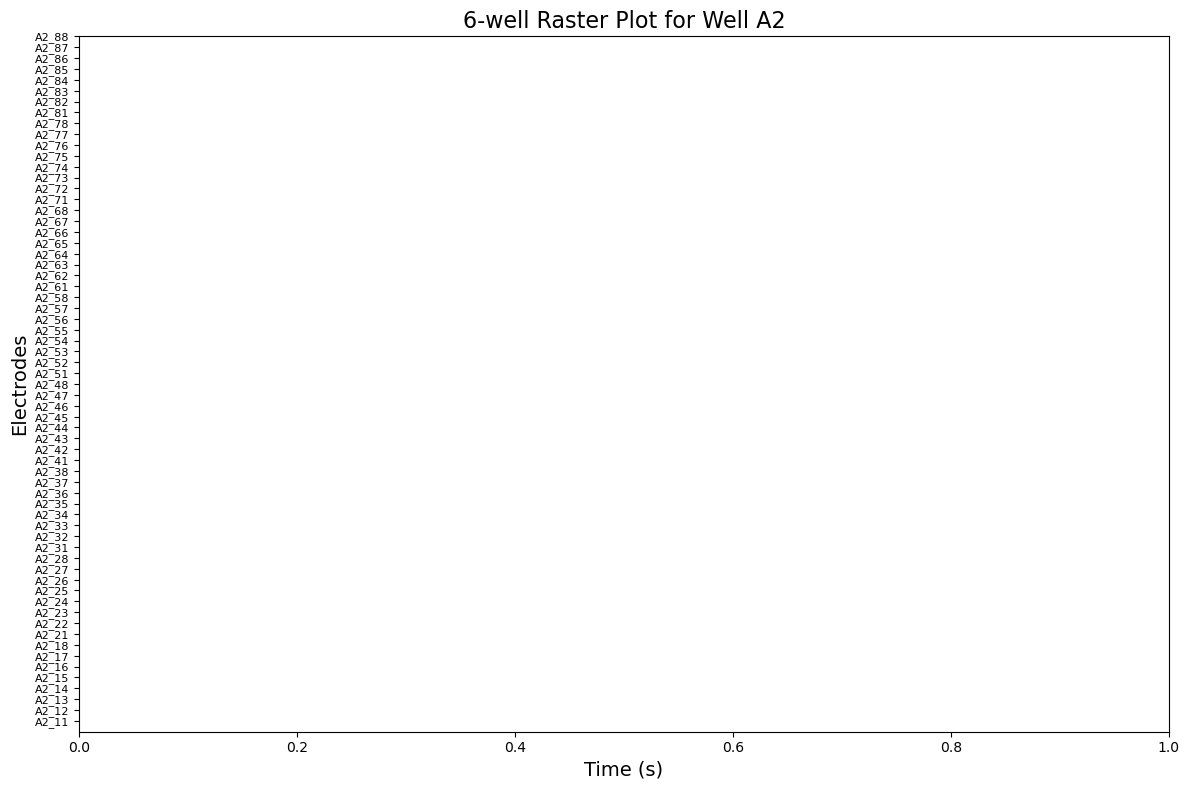

Saved raster plot for A3 at plots/rasters/000/A3_6_well_raster.png


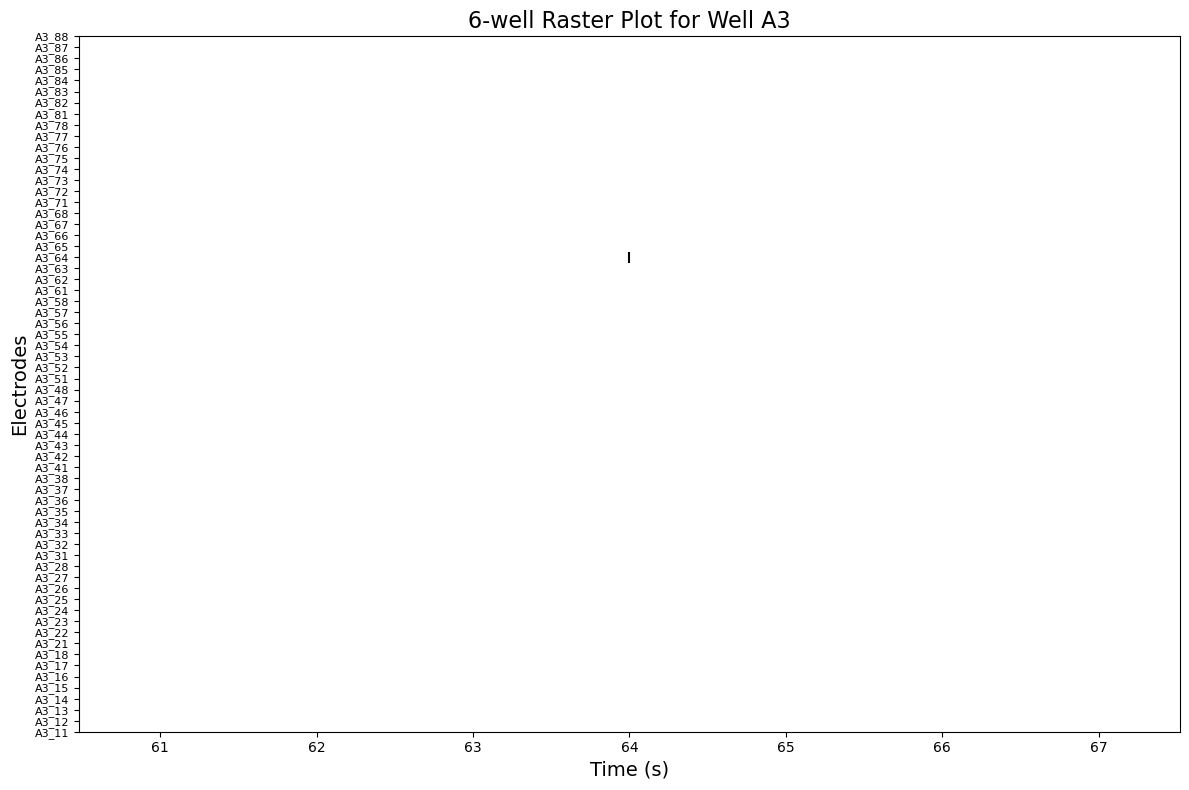

Saved raster plot for B1 at plots/rasters/000/B1_6_well_raster.png


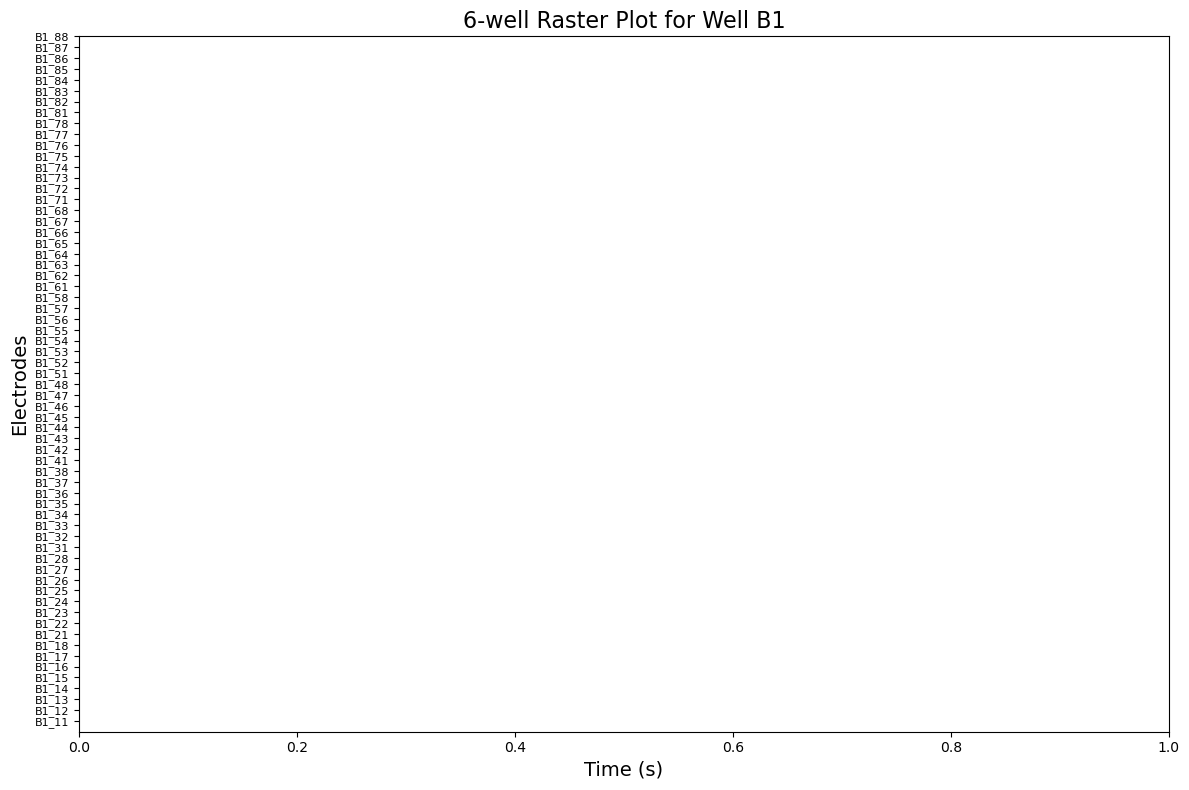

Saved raster plot for B2 at plots/rasters/000/B2_6_well_raster.png


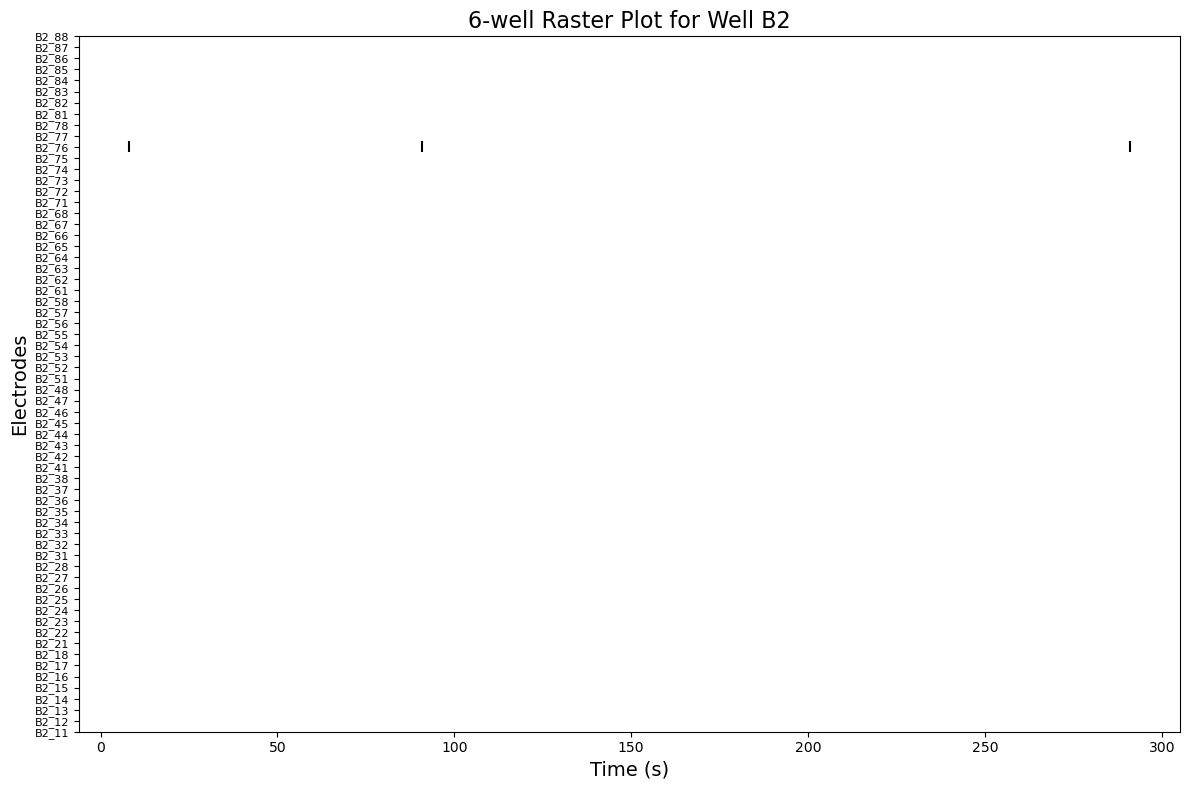

Saved raster plot for B3 at plots/rasters/000/B3_6_well_raster.png


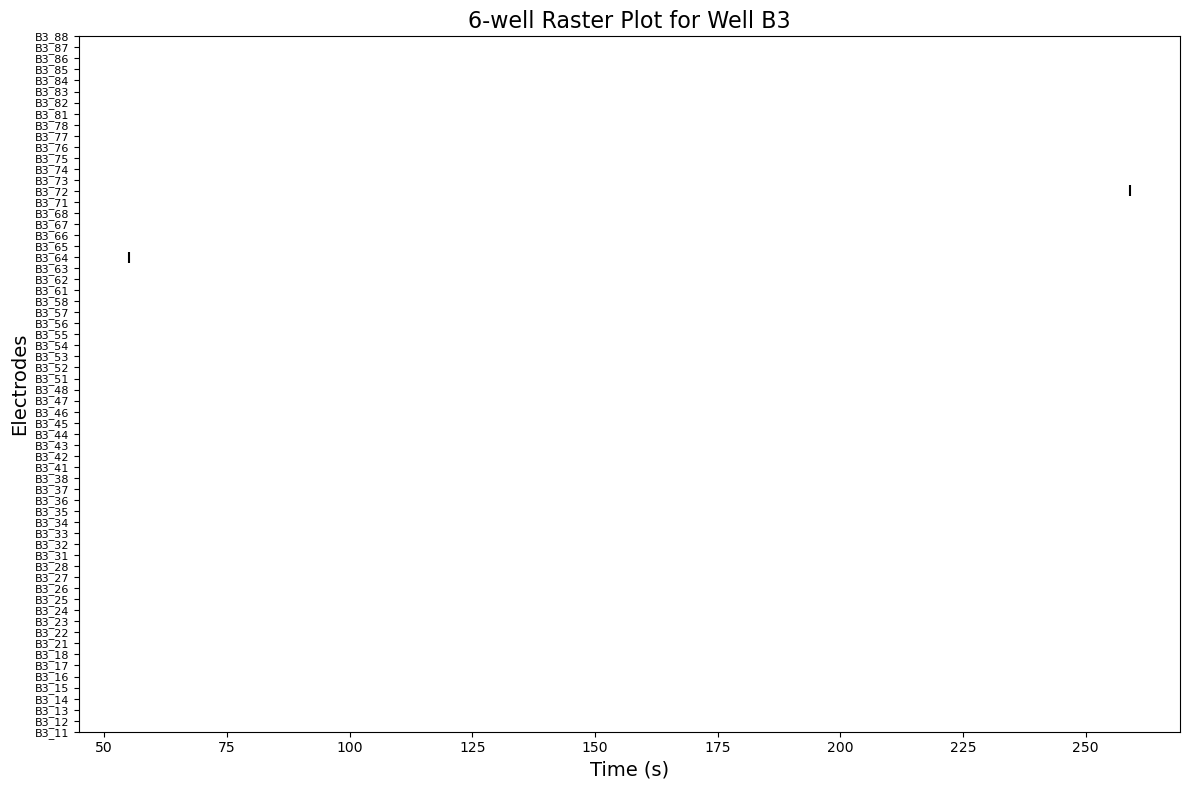

In [34]:
# 6 well plots 
file_path = "rasters_data/Ivana_6well_NOTCHmutants(000)(000)_spike_counts.csv"
data = pd.read_csv(file_path)
save_path = 'plots/rasters/000'

def plot_raster(data, well_name):
    # Filter columns for the specific well
    well_columns = [col for col in data.columns if col.startswith(well_name)]
    interval_start = data["Interval_Start"]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    for idx, electrode in enumerate(well_columns):
        # Get spike activity for the electrode
        spike_times = interval_start[data[electrode] == 1]
        ax.vlines(spike_times, idx + 0.5, idx + 1.5, color='black')  # Add vertical lines

    # Configure the plot
    ax.set_xlabel("Time (s)", fontsize=14)
    ax.set_ylabel("Electrodes", fontsize=14)
    ax.set_title(f"6-well Raster Plot for Well {well_name}", fontsize=16)
    ax.set_yticks(range(1, len(well_columns) + 1))
    ax.set_yticklabels(well_columns, fontsize=8)
    plt.tight_layout()

    # Save the plot before displaying or clearing
    plot_path = os.path.join(save_path, f"{well_name}_6_well_raster.png")
    plt.savefig(plot_path)
    print(f"Saved raster plot for {well_name} at {plot_path}")

    # Show the plot (optional)
    plt.show()
    plt.close()

# Generate raster plots for each well
wells = ["A1", "A2", "A3", "B1", "B2", "B3"]
for well in wells:
    plot_raster(data, well)

**Ivana 24-well rasters**

In [35]:
# Load your data
file_path = "rasters_data/Ivana_24_well_NOTCHmutants(000)(000)_spike_counts.csv" 
data = pd.read_csv(file_path)
save_path = 'plots/rasters/000'

# Function to calculate total activity for each well
def calculate_activity(data, well_name):
    well_columns = [col for col in data.columns if col.startswith(well_name)]
    return data[well_columns].sum().sum()

# Function to plot raster for a single well
def plot_raster(data, well_name):
    well_columns = [col for col in data.columns if col.startswith(well_name)]
    interval_start = data["Interval_Start"]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    for idx, electrode in enumerate(well_columns):
        # Get spike activity for the electrode
        spike_times = interval_start[data[electrode] == 1]
        ax.vlines(spike_times, idx + 0.5, idx + 1.0, color='black')  # Add vertical lines

    # Configure the plot
    ax.set_xlabel("Time (s)", fontsize=14)
    ax.set_ylabel("Electrodes", fontsize=14)
    ax.set_title(f"24-well Raster Plot for Well {well_name}", fontsize=16)
    ax.set_yticks(range(1, len(well_columns) + 1))
    ax.set_yticklabels(well_columns, fontsize=8)
    plt.tight_layout()

    # Save the plot
    plot_path = os.path.join(save_path, f"{well_name}_24_well_raster.png")
    plt.savefig(plot_path)
    print(f"Saved raster plot for {well_name} at {plot_path}")
    plt.close()

# Define the 24 wells in a 6x4 plate (A1-A6, B1-B6, C1-C6, D1-D6)
wells = [
    [f"A{i}" for i in range(1, 7)],
    [f"B{i}" for i in range(1, 7)],
    [f"C{i}" for i in range(1, 7)],
    [f"D{i}" for i in range(1, 7)]
]

# Determine the 2 most active wells for each row
most_active_wells = []
for row in wells:
    row_activities = {well: calculate_activity(data, well) for well in row}
    # Get the two wells with the highest activity
    top_2_wells = sorted(row_activities, key=row_activities.get, reverse=True)[:2]
    most_active_wells.extend(top_2_wells)

# Plot rasters for the most active wells
for well in most_active_wells:
    plot_raster(data, well)

Saved raster plot for A1 at plots/rasters/000/A1_24_well_raster.png
Saved raster plot for A2 at plots/rasters/000/A2_24_well_raster.png
Saved raster plot for B1 at plots/rasters/000/B1_24_well_raster.png
Saved raster plot for B2 at plots/rasters/000/B2_24_well_raster.png
Saved raster plot for C4 at plots/rasters/000/C4_24_well_raster.png
Saved raster plot for C1 at plots/rasters/000/C1_24_well_raster.png
Saved raster plot for D3 at plots/rasters/000/D3_24_well_raster.png
Saved raster plot for D4 at plots/rasters/000/D4_24_well_raster.png
